In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("car_Dekho_DA.csv")
data.head(6)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0


# Statistical information of the data

In [4]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


From the above analysis we get that-

1. The data here contains car with manufacturing year 2003 to 2018.
2. The lowest price in which the car was sold is INR 10,000/-
3. The highest price in which the car was sold is INR 35 lacs
4. There are 301 records in the data.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

From this above analysis we get-
1. None of the columns here have null values.
2. Variables like Car_Name,Fuel_Type,Seller_Type,and Transmission are non-numeric in nature.

In [7]:
print(data.Car_Name.value_counts())

Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64


In [8]:
print(data.Fuel_Type.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64


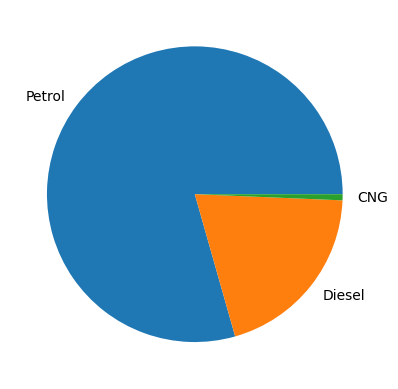

In [10]:
plt.pie(data.Fuel_Type.value_counts(),labels=['Petrol','Diesel','CNG'])
plt.show()

<Axes: xlabel='Fuel_Type'>

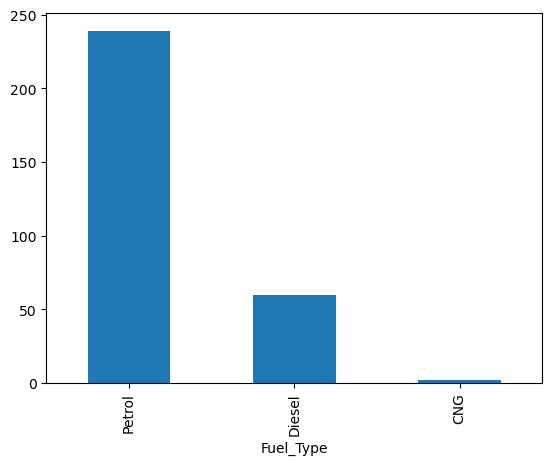

In [12]:
data.Fuel_Type.value_counts().plot.bar()

In [13]:
data.Seller_Type.value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [14]:
data.Transmission.value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

So, from this analysis we get-
1. There are 106 Individual type of sellers.
2. There are 40 Automatic type of transmission vehicle.

In [16]:
data.Owner.value_counts()

Owner
0    290
1     10
3      1
Name: count, dtype: int64

Therefore, from this we conclude that there are 10 single owner vehicles.

In [21]:
data['depreciation'] = data['Selling_Price'] - data['Present_Price']

In [22]:
data.loc[data['depreciation'].idxmax()]

Car_Name         Honda Activa 4G
Year                        2017
Selling_Price               0.48
Present_Price               0.51
Kms_Driven                  4300
Fuel_Type                 Petrol
Seller_Type           Individual
Transmission           Automatic
Owner                          0
depreciation               -0.03
Name: 155, dtype: object

In [23]:
data.loc[data['depreciation'].idxmin()]

Car_Name         land cruiser
Year                     2010
Selling_Price            35.0
Present_Price            92.6
Kms_Driven              78000
Fuel_Type              Diesel
Seller_Type            Dealer
Transmission           Manual
Owner                       0
depreciation            -57.6
Name: 86, dtype: object

From this we conclude that Car_Name = land cruiser has the minimun depreciation and Car_Name= Honda Activa 4G has the maximum depreciation cost.

In [25]:
brand_dep = data.groupby('Car_Name')['depreciation'].mean().sort_values()

In [26]:
brand_dep.head()

Car_Name
land cruiser    -57.600000
camry           -21.230000
fortuner        -12.047273
corolla         -10.850000
corolla altis   -10.399375
Name: depreciation, dtype: float64

In [27]:
data.corr(numeric_only=True)['depreciation'].sort_values(ascending=False)


depreciation     1.000000
Year             0.333746
Owner           -0.107415
Kms_Driven      -0.333832
Selling_Price   -0.520881
Present_Price   -0.864902
Name: depreciation, dtype: float64

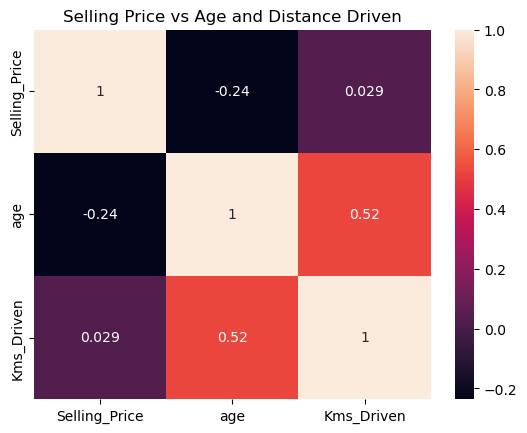

In [29]:
data['age'] = 2025 - data['Year']
sns.heatmap(data[['Selling_Price', 'age', 'Kms_Driven']].corr(), annot=True)
plt.title("Selling Price vs Age and Distance Driven")
plt.show()

From this we conclude that Selling_Price has an affect on age or a higher impact as compared to distance.

In [30]:
data[data['Year']>2014]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,depreciation,age
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,-2.60,8
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0,-0.58,7
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0,-1.37,10
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0,-2.11,10
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0,-0.14,9
...,...,...,...,...,...,...,...,...,...,...,...
295,city,2015,8.55,13.09,60076,Diesel,Dealer,Manual,0,-4.54,10
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,-2.10,9
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,-1.90,10
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,-1.00,8


In [31]:
data.loc[data['Year'].idxmin()]

Car_Name                800
Year                   2003
Selling_Price          0.35
Present_Price          2.28
Kms_Driven           127000
Fuel_Type            Petrol
Seller_Type      Individual
Transmission         Manual
Owner                     0
depreciation          -1.93
age                      22
Name: 37, dtype: object

In [32]:
data.loc[data['Year'].idxmax()]

Car_Name         vitara brezza
Year                      2018
Selling_Price             9.25
Present_Price             9.83
Kms_Driven                2071
Fuel_Type               Diesel
Seller_Type             Dealer
Transmission            Manual
Owner                        0
depreciation             -0.58
age                          7
Name: 5, dtype: object

Therefore, from the above analysis of the data we get that-
1. No. of cars manufactured after 2014 were listed.
2. The oldest car is 800 which was manufactured in the year 2003.
3. The newest car is vitara brezza which was manufactured in the year 2018.